# The Sparks Foundation - GRIP - Data Science and Business Analytics - NOV'2020

TASK 1 : Prediction using supervised ML
    
Author : Deep Patel
    
Dataset used: Student Scores

Problem Statements:
1. Predict the percentage of a student based on the number of study hours.
2. What will be the predicted score if a studentstudies for 9.25 hrs/day?

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sea
%matplotlib inline

In [58]:
df = pd.read_csv("http://bit.ly/w-data")
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### To check whether there are any missing values in the dataset provided we will use info()

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [60]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### VISUALIZE THE DATA

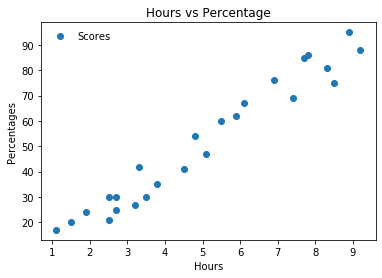

In [61]:
df.plot(x="Hours",y="Scores",style="o")
plt.title("Hours vs Percentage")
plt.xlabel("Hours")
plt.ylabel("Percentages")
plt.legend(frameon=False)
plt.show()

### Seperate the features and targets

In [62]:
a = df.iloc[:,:-1].values
b = df['Scores'].values

### Train-test split

In [63]:
a_train,a_test,b_train,b_test = train_test_split(a,b,test_size=0.2,random_state=0)

### Model Building

In [64]:
regressor = LinearRegression()
regressor.fit(a_train,b_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

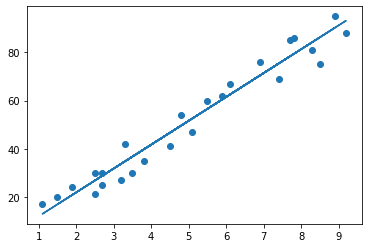

In [65]:
line = regressor.coef_*a + regressor.intercept_

plt.scatter(a,b)
plt.plot(a , line)
plt.show()

In [66]:
print(a_test)
b_pred = regressor.predict(a_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [67]:
df1 = pd.DataFrame({"Actual":b_test,"Predicted scores":b_pred})
df1

,Actual,Predicted scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


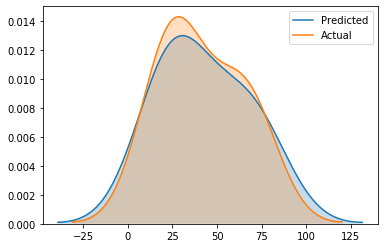

In [68]:
sea.kdeplot(b_pred, label="Predicted", shade=True)
sea.kdeplot(b_test, label="Actual", shade=True)

In [69]:
hrs = 9.25
ownpred = regressor.predict([[hrs]])
print("Number of hours: {}".format(hrs))
print("Predicted scores: {}".format(ownpred[0]))

Number of hours: 9.25
Predicted scores: 93.69173248737538


### Evaluation of algorithm

In [70]:
print("Mean Absolute Error:", metrics.mean_absolute_error(b_test,b_pred))
print("Mean Squared Error:", metrics.mean_squared_error(b_test,b_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(b_test,b_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


# Conclusion

I could successfully complete the Prediction using Supervised ML Task and could evaluate the model's performance on various parameters. Thank you!!!